# movie_분류

## import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier 
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split

# 평가지표
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

## 파일 로드 및 데이터 정리

In [3]:
df = pd.read_excel('data_mv.xlsx')

In [4]:
df.head(2)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor,year
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",2019
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",2019


In [5]:
df.columns

Index(['title', 'opening_date', 'sum_sales', 'sum_audience', 'screens',
       'shows', 'main_nation', 'producer', 'distributor', 'rated', 'genre',
       'director', 'actor', 'year'],
      dtype='object')

In [6]:
df_copy = df.copy()

In [7]:
df_copy.drop(columns=['title', 'opening_date', 'main_nation', 'producer', 'distributor', 'rated', 'genre', 'director', 'actor', 'year'], inplace=True)

In [8]:
df_copy

,sum_sales,sum_audience,screens,shows
0,139651845516,16265618,2003,292584
1,122182694160,13934592,2835,242001
2,111596248720,13369064,2648,282557
3,106955138359,12552283,1409,266469
4,102677675409,12276350,2235,180042
...,...,...,...,...
1637,127441000,11948,27,619
1638,86374000,11547,52,836
1639,75017000,11116,58,985
1640,72851000,10885,47,718


## 박스오피스 관람객수에 따른 흥행등급 나누기

In [14]:
# 박스오피스 관람객수에 따른 흥행등급 나누기
def box_office(sum_audience):
    cat = ''
    if sum_audience < 1000000: cat = 0 
    elif sum_audience < 5000000 : cat = 1
    elif sum_audience < 7000000 : cat = 2
    elif sum_audience < 10000000 : cat = 3
    else : cat = 4
    return cat

# df_copy['box_office'] = df_copy['sum_audience'].apply(lambda x : box_office(x))
# df_copy.head(2)

df_copy['box_office'] = df_copy['sum_audience'].apply(lambda x : box_office(x))
df.head(2)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,genre,director,actor,year
0,극한직업,2019-01-23,139651845516,16265618,2003,292584,한국,"(주)어바웃잇,영화사 해그림 주식회사,(주)씨제이이엔엠",(주)씨제이이엔엠,15세이상관람가,코미디,이병헌,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,한준우,김명준,나철,정재광,정원창,...",2019
1,어벤져스: 엔드게임,2019-04-24,122182694160,13934592,2835,242001,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,12세이상관람가,"액션,SF","안소니 루소,조 루소","로버트 다우니 주니어,크리스 에반스,마크 러팔로,크리스 헴스워스,스칼렛 요한슨,제레...",2019


In [10]:
df_copy[df_copy['sum_audience'] > 10000000].count()

sum_sales       19
sum_audience    19
screens         19
shows           19
box_office      19
dtype: int64

In [15]:
df_copy['box_office'].value_counts()

0    1164
1     393
2      43
3      23
4      19
Name: box_office, dtype: int64

In [ ]:
# df_box_offfice = df['box_office'].value_counts()

(array([1164.,    0.,  393.,    0.,    0.,   43.,    0.,   23.,    0.,
          19.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

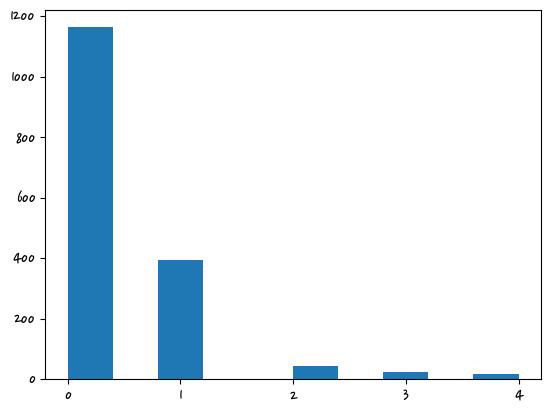

In [16]:
plt.hist(df_copy['box_office'])

In [18]:
df1 = df.reset_index()

In [19]:
sns.barplot(x='box_office', y='index', data = df1)

ValueError: Could not interpret input 'box_office'

## 데이터 학습

In [ ]:
X_data = df_copy.iloc[:, :-1]
y_data = df_copy['box_office']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=11)

In [ ]:
# X_data, y_data
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(f'DecisionTreeClassifier 예측 정확도 : {accuracy_score(y_test, dt_pred)}')

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f'RandomForestClassifier 예측 정확도 : {accuracy_score(y_test, rf_pred)}')

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(f'LogisticRegression 예측 정확도 : {accuracy_score(y_test, lr_pred)}')

## 평가지표

In [ ]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    print('오차행렬')
    print(confusion)
    
    print(f'정확도 : {accuracy}, 정밀도 : {precision}, 재현율 : {recall}, F1 : {f1}')

In [ ]:
pred_proba = lr_clf.pred_proba(X_test)
get_clf_eval(y_test, pred_proba[:, 1].reshape(-1, 1))